In [1]:
#import libraries 
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read zip file dataset
zf = zipfile.ZipFile('C:/Users/181589/Downloads/flight-dataset.zip')

# loop through all CSV files in windows
match = [s for s in zf.namelist() if ".csv" in s and "__" not in s ]
print(match)

['flight-dataset/carriers.csv', 'flight-dataset/months.csv', 'flight-dataset/weekdays.csv']


In [2]:
# read flights dataset from tar gz format into dataframe with column names

df_flights = pd.read_csv('C:/Users/181589/Downloads/flight-dataset/flight-dataset/flights-small.tar.gz', compression='gzip', header=None, sep=',', names =['fid','month_id','day_of_month','day_of_week_id','carrier_id','flight_num','origin_city','origin_state' ,'dest_city' ,'dest_state' ,'departure_delay' ,'taxi_out' ,'arrival_delay' ,'canceled' ,'actual_time' ,'distance' ,'capacity' ,'price' ])

C:\Users\181589\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# check number of rows and columns
df_flights.shape

(1148676, 18)

In [4]:
# drop null rows in the flight dataframe
df_flights = df_flights.dropna()

In [5]:
# check number of rows and columns
df_flights.shape

(1148675, 18)

In [6]:
# assign data types to columns
df_flights=df_flights.astype(dtype={'fid':str,'month_id':int,'day_of_month':int,'day_of_week_id':int,'carrier_id':str,
'flight_num':int,'origin_city':str,'origin_state' :str,'dest_city':str,'dest_state':str ,'departure_delay':int ,'taxi_out':int ,'arrival_delay':int ,'canceled':int ,'actual_time':int ,'distance':int ,'capacity':int ,'price' :int})

In [8]:
# read first 10 rows in flights
df_flights.head(10)

,fid,month_id,day_of_month,day_of_week_id,carrier_id,flight_num,origin_city,origin_state,dest_city,dest_state,departure_delay,taxi_out,arrival_delay,canceled,actual_time,distance,capacity,price
0,flights-small.csv,7,1,5,AA,1,New York NY,New York,Los Angeles CA,California,-4,29,9,0,360,2475,10,480
1,2,7,2,6,AA,1,New York NY,New York,Los Angeles CA,California,-7,13,-10,0,344,2475,11,817
2,3,7,3,7,AA,1,New York NY,New York,Los Angeles CA,California,-1,17,-4,0,344,2475,14,789
3,4,7,4,1,AA,1,New York NY,New York,Los Angeles CA,California,-9,20,17,0,373,2475,3,523
4,5,7,5,2,AA,1,New York NY,New York,Los Angeles CA,California,-6,32,12,0,365,2475,8,606
5,6,7,6,3,AA,1,New York NY,New York,Los Angeles CA,California,-4,34,13,0,364,2475,0,979
6,7,7,7,4,AA,1,New York NY,New York,Los Angeles CA,California,-4,16,-7,0,344,2475,6,516
7,8,7,8,5,AA,1,New York NY,New York,Los Angeles CA,California,25,35,22,0,344,2475,0,292
8,9,7,9,6,AA,1,New York NY,New York,Los Angeles CA,California,-4,30,-5,0,346,2475,15,201
9,10,7,10,7,AA,1,New York NY,New York,Los Angeles CA,California,-4,29,-11,0,340,2475,2,782


In [9]:
# read carriers data into dataframe
df_carrier=pd.read_csv(zf.open(match[0]),names=['cid','name'],dtype={'cid': str,'name':str})
#match[0]

In [10]:
# read first 10 rows in carriers
df_carrier.head(10)

,cid,name
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,Comlux Aviation AG
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.
5,09Q,Swift Air LLC
6,0BQ,DCA
7,0CQ,ACM AIR CHARTER GmbH
8,0GQ,Inter Island Airways d/b/a Inter Island Air
9,0HQ,Polar Airlines de Mexico d/b/a Nova Air


In [11]:
# read months data into dataframe
df_months=pd.read_csv(zf.open(match[1]),names=['mid','month'],dtype={'mid': int,'month':str})
print(df_months)

    mid      month
0     1    January
1     2   February
2     3      March
3     4      April
4     5        May
5     6       June
6     7       July
7     8     August
8     9  September
9    10    October
10   11   November
11   12   December


In [12]:
# read weekdays data into dataframe
df_weekdays=pd.read_csv(zf.open(match[2]),header=None,names=['did','day_of_week'],dtype={'did': int,'day_of_week':str})
print(df_weekdays)

   did day_of_week
0    1      Monday
1    2     Tuesday
2    3   Wednesday
3    4    Thursday
4    5      Friday
5    6    Saturday
6    7      Sunday
7    9     Unknown


In [13]:
# join flights and carriers dataframe
df_flights_carrier= pd.merge(left=df_flights, right=df_carrier, left_on='carrier_id', right_on='cid')
df_flights_carrier.head(10)

,fid,month_id,day_of_month,day_of_week_id,carrier_id,flight_num,origin_city,origin_state,dest_city,dest_state,departure_delay,taxi_out,arrival_delay,canceled,actual_time,distance,capacity,price,cid,name
0,flights-small.csv,7,1,5,AA,1,New York NY,New York,Los Angeles CA,California,-4,29,9,0,360,2475,10,480,AA,American Airlines Inc.
1,2,7,2,6,AA,1,New York NY,New York,Los Angeles CA,California,-7,13,-10,0,344,2475,11,817,AA,American Airlines Inc.
2,3,7,3,7,AA,1,New York NY,New York,Los Angeles CA,California,-1,17,-4,0,344,2475,14,789,AA,American Airlines Inc.
3,4,7,4,1,AA,1,New York NY,New York,Los Angeles CA,California,-9,20,17,0,373,2475,3,523,AA,American Airlines Inc.
4,5,7,5,2,AA,1,New York NY,New York,Los Angeles CA,California,-6,32,12,0,365,2475,8,606,AA,American Airlines Inc.
5,6,7,6,3,AA,1,New York NY,New York,Los Angeles CA,California,-4,34,13,0,364,2475,0,979,AA,American Airlines Inc.
6,7,7,7,4,AA,1,New York NY,New York,Los Angeles CA,California,-4,16,-7,0,344,2475,6,516,AA,American Airlines Inc.
7,8,7,8,5,AA,1,New York NY,New York,Los Angeles CA,California,25,35,22,0,344,2475,0,292,AA,American Airlines Inc.
8,9,7,9,6,AA,1,New York NY,New York,Los Angeles CA,California,-4,30,-5,0,346,2475,15,201,AA,American Airlines Inc.
9,10,7,10,7,AA,1,New York NY,New York,Los Angeles CA,California,-4,29,-11,0,340,2475,2,782,AA,American Airlines Inc.


In [14]:
# First Question : Find the maximum price of tickets between Seattle and New York, NY (i.e. Seattle to NY or NY to Seattle) for each carrier
df_Sea_NY = df_flights_carrier[df_flights_carrier['origin_city'].str.contains("Seattle") &
                               df_flights_carrier['dest_city'].str.contains("New York")]

In [15]:
# See first few rows of flights from Seattle to NY
df_Sea_NY.head(5)

,fid,month_id,day_of_month,day_of_week_id,carrier_id,flight_num,origin_city,origin_state,dest_city,dest_state,departure_delay,taxi_out,arrival_delay,canceled,actual_time,distance,capacity,price,cid,name
2211,2212,7,1,5,AA,198,Seattle WA,Washington,New York NY,New York,6,26,23,0,333,2421,8,698,AA,American Airlines Inc.
2212,2213,7,2,6,AA,198,Seattle WA,Washington,New York NY,New York,0,14,-17,0,299,2421,9,127,AA,American Airlines Inc.
2213,2214,7,3,7,AA,198,Seattle WA,Washington,New York NY,New York,5,17,-2,0,309,2421,19,306,AA,American Airlines Inc.
2214,2215,7,4,1,AA,198,Seattle WA,Washington,New York NY,New York,1,15,-8,0,307,2421,14,694,AA,American Airlines Inc.
2215,2216,7,5,2,AA,198,Seattle WA,Washington,New York NY,New York,0,20,7,0,323,2421,7,183,AA,American Airlines Inc.


# See the report which shows the maximum Price from Seattle to NY by Carrier

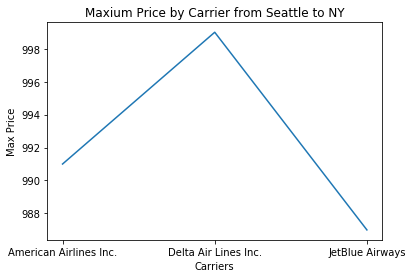

In [16]:
# See the report which shows the maximum Price from Seattle to NY by Carrier

max_price = df_Sea_NY.groupby('name')['price'].max()
plt.xlabel('Carriers')
plt.ylabel('Max Price')
plt.title('Maxium Price by Carrier from Seattle to NY')
plt.plot(max_price);

In [17]:
# merge flights data with Day of Week data
df_flt_car_dow = pd.merge(left=df_flights_carrier, right=df_weekdays, left_on='day_of_week_id', right_on='did')
df_flt_car_dow.head(5)

,fid,month_id,day_of_month,day_of_week_id,carrier_id,flight_num,origin_city,origin_state,dest_city,dest_state,...,arrival_delay,canceled,actual_time,distance,capacity,price,cid,name,did,day_of_week
0,flights-small.csv,7,1,5,AA,1,New York NY,New York,Los Angeles CA,California,...,9,0,360,2475,10,480,AA,American Airlines Inc.,5,Friday
1,8,7,8,5,AA,1,New York NY,New York,Los Angeles CA,California,...,22,0,344,2475,0,292,AA,American Airlines Inc.,5,Friday
2,15,7,15,5,AA,1,New York NY,New York,Los Angeles CA,California,...,-18,0,334,2475,4,650,AA,American Airlines Inc.,5,Friday
3,22,7,22,5,AA,1,New York NY,New York,Los Angeles CA,California,...,-12,0,337,2475,15,532,AA,American Airlines Inc.,5,Friday
4,29,7,29,5,AA,1,New York NY,New York,Los Angeles CA,California,...,9,0,356,2475,15,607,AA,American Airlines Inc.,5,Friday


In [18]:
#For all the direct flights from Seattle to Boston by Alaska Airlines Inc., visualize the average cost of a ticket by day of the week.
df_sea_bos = df_flt_car_dow[df_flt_car_dow['origin_city'].str.contains("Seattle") &
                               df_flt_car_dow['dest_city'].str.contains("Boston")& df_flt_car_dow['name'].str.contains("Alaska")]

# Plot to Show Average Price by DOW from Seattle to Boston

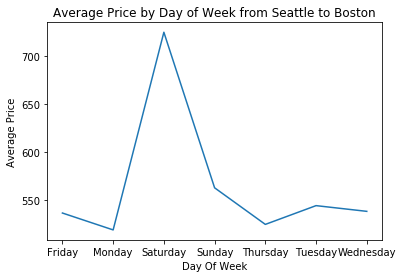

In [19]:
# Plot to Show Average Price by DOW from Seattle to Boston
avg_price = df_sea_bos.groupby('day_of_week')['price'].mean()
avg_price
plt.xlabel('Day Of Week')
plt.ylabel('Average Price')
plt.title('Average Price by Day of Week from Seattle to Boston')
plt.plot(avg_price);

In [20]:
# List of Flights from Seattle
df_sea = df_flt_car_dow[df_flt_car_dow['origin_city'].str.contains("Seattle")]

In [21]:
# list number of rows and columns in Seattle Flights data
df_sea.shape

(22062, 22)

In [22]:
# to see whats the avg distance from Seattle to any destination
df_mean_dist = df_sea['distance'].mean()
df_mean_dist

1258.0287825219834

In [23]:
# top 10 list of flights from Seattle with maximum distance to different cities
df_max_dist = df_sea.groupby(['origin_city','dest_city'])['distance'].max().sort_values(ascending=False)
#df_sea.groupby('origin_city','dest_city').nlargest(3,'distance')
print(df_max_dist.nlargest(10))
df_top10_dist = pd.DataFrame(df_max_dist.nlargest(10))

origin_city  dest_city         
Seattle WA   Miami FL              2724
             Fort Lauderdale FL    2717
             Lihue HI              2701
             Kona HI               2688
             Honolulu HI           2677
             Kahului HI            2640
             Orlando FL            2554
             Tampa FL              2520
             Boston MA             2496
             New York NY           2422
Name: distance, dtype: int32


In [24]:
# table to show distances from Seattle to Cities
df_top10_dist 

distance
origin_city dest_city                   
Seattle WA  Miami FL                2724
            Fort Lauderdale FL      2717
            Lihue HI                2701
            Kona HI                 2688
            Honolulu HI             2677
            Kahului HI              2640
            Orlando FL              2554
            Tampa FL                2520
            Boston MA               2496
            New York NY             2422

In [27]:
# Filter Seattle flights to top 10 destinations with maximum distance and no cancellations
df_sea_top10 = df_sea[df_sea.distance.isin(df_top10_dist.distance) ]
df_sea_Final=df_sea_top10.query('canceled==0')
    

In [28]:
# show total rows and columns to data for analysis
df_sea_Final.shape

(1135, 22)

In [29]:
#For Seattle Flights to top 10 destination with minimum time

df_sea_Final2=df_sea_Final.groupby(['origin_city','dest_city','distance'])['actual_time'].min().sort_values(ascending=False)

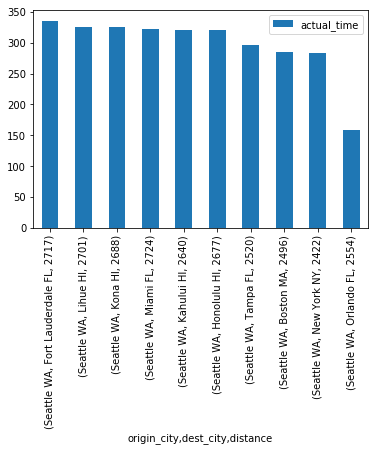

In [30]:
# Show the flights in the chart
df_sea_Final2
df_top10_low_time= pd.DataFrame(df_sea_Final2.nlargest(10))
df_top10_low_time.plot(kind='bar');

# For Seattle Flights to top 10 destination with minimum time

In [35]:

df_top10_low_time

actual_time
origin_city dest_city          distance             
Seattle WA  Fort Lauderdale FL 2717              336
            Lihue HI           2701              326
            Kona HI            2688              326
            Miami FL           2724              323
            Kahului HI         2640              320
            Honolulu HI        2677              320
            Tampa FL           2520              297
            Boston MA          2496              285
            New York NY        2422              283
            Orlando FL         2554              159

In [32]:
# Flights from Seattle to top 10 destinations with 75th Percentile actual times

df_sea_Final3=df_sea_Final.groupby(['origin_city','dest_city','distance','day_of_week'])['actual_time'].apply(lambda x: np.percentile(x,75))

In [33]:
# drop multilevel indices to transpose
df_sea_Final3.droplevel(0) 

dest_city           distance  day_of_week
Boston MA           2496      Friday         314.00
                              Monday         316.50
                              Saturday       313.00
                              Sunday         320.00
                              Thursday       318.25
                              Tuesday        316.00
                              Wednesday      318.00
Fort Lauderdale FL  2717      Friday         355.00
                              Monday         364.50
                              Saturday       361.00
                              Sunday         348.00
                              Thursday       349.50
                              Tuesday        350.75
                              Wednesday      342.00
Honolulu HI         2677      Friday         360.50
                              Monday         358.25
                              Saturday       362.00
                              Sunday         355.00
                      

# show the flights from Seattle to top 10 destinations with 75th percentile least amount of time by day of Week 

In [34]:
# show the flights from Seattle to top 10 destinations with 75th percentile least amount of time by day of Week 
df_sea_Final3.unstack(level=[3]).sort_values(by=['distance'],ascending=False)

day_of_week                              Friday  Monday  Saturday  Sunday  \
origin_city dest_city          distance                                     
Seattle WA  Miami FL           2724      353.00  345.50    346.00  350.75   
            Fort Lauderdale FL 2717      355.00  364.50    361.00  348.00   
            Lihue HI           2701      366.00  356.00    361.50  367.00   
            Kona HI            2688      352.75  356.75    360.00  359.00   
            Honolulu HI        2677      360.50  358.25    362.00  355.00   
            Kahului HI         2640      353.75  354.50    357.75  356.00   
            Orlando FL         2554      332.00  336.25    343.00  321.00   
            Tampa FL           2520      336.00  321.00    333.00  330.00   
            Boston MA          2496      314.00  316.50    313.00  320.00   
            New York NY        2422      316.00  321.25    315.75  315.00   

day_of_week                              Thursday  Tuesday  Wednesday  
origin_city dest_city          distance                                
Seattle WA  Miami FL           2724        348.00   355.00     346.25  
            Fort Lauderdale FL 2717        349.50   350.75     342.00  
            Lihue HI           2701        367.25   349.00     349.50  
            Kona HI            2688        348.75   357.25     363.00  
            Honolulu HI        2677        356.25   356.00     354.25  
            Kahului HI         2640        352.00   357.00     355.00  
            Orlando FL         2554        348.75   336.00     337.00  
            Tampa FL           2520        320.50   322.75     320.75  
            Boston MA          2496        318.25   316.00     318.00  
            New York NY        2422        331.75   316.25     319.00

# I would recommend 2 options. 
1) Based on maximum distance and minimum flight time, Seattle to Miami Flight is the good option.
2) Based on maximum distance and 75th percentile of actual flight time ( so to remove outliers I mean take out high arrival or departure delays) along with day of week consideration , See above table with top 10 destinations from Seattle and recommend 3 places, Miami , Fort Lauderdale and Kona.